This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python. For example, here's several helpful packages to load in:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re 

Input data files are available in the "../input/" directory. For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.rcParams["figure.figsize"] = (20,10)

RANDOM_SEED = 42

In [3]:
columns = ['user','activity','timestamp', 'xaxis', 'yaxis', 'zaxis']

In [4]:
import os

# Getting the working directory
os.getcwd()

'/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152'

In [5]:
# Setting the working directory
os.chdir('/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152') 

In [6]:
# Getting the working directory
os.getcwd()

'/Users/jaenagaray/Documents/1 ITS Capstone Project Unit 1152/ITS Capstone Project Unit 1152'

In [7]:
# Importing and reading the text dataset
df = pd.read_csv("WISDM_ar_v1.1_raw.txt", 
                 header = None,
                 delimiter=",",
                 names = columns,
                 error_bad_lines=False)

/var/folders/zf/dkpjzxlx4mq4wbk312mvsrvh0000gn/T/ipykernel_2235/2365616666.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("WISDM_ar_v1.1_raw.txt",
b'Skipping line 197688: expected 6 fields, saw 11\n'
b'Skipping line 273262: expected 6 fields, saw 11\nSkipping line 371933: expected 6 fields, saw 11\n'
b'Skipping line 711485: expected 6 fields, saw 11\n'
b'Skipping line 832904: expected 6 fields, saw 7\nSkipping line 832905: expected 6 fields, saw 7\nSkipping line 832906: expected 6 fields, saw 7\nSkipping line 832907: expected 6 fields, saw 7\nSkipping line 832908: expected 6 fields, saw 7\nSkipping line 832909: expected 6 fields, saw 7\nSkipping line 832910: expected 6 fields, saw 7\nSkipping line 832911: expected 6 fields, saw 7\nSkipping line 832912: expected 6 fields, saw 7\nSkipping line 832913: expected 6 fields, saw 7\nSkipping line 832914: expected 6 fields, saw 7

In [8]:
# Removing the Nan values in the dataframe
df=df.dropna()

In [9]:
# Removing the ';' in zaxis. This causes the values to be characters/object
df['zaxis'] = df['zaxis'].str.replace(';', '')

In [10]:
# Showing the first five rows of the dataframe (overview)
df.head()

,user,activity,timestamp,xaxis,yaxis,zaxis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [11]:
# Shows information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086467 entries, 0 to 1086467
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086467 non-null  int64  
 1   activity   1086467 non-null  object 
 2   timestamp  1086467 non-null  int64  
 3   xaxis      1086467 non-null  float64
 4   yaxis      1086467 non-null  float64
 5   zaxis      1086467 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.0+ MB


The z axis column looks like its being identified by pandas as an object, let's transform it to float!

In [12]:
df['zaxis'] = df['zaxis'].map(lambda x: str(re.findall("\d+\.\d+", str(x))))
df['zaxis'] = df['zaxis'].map(lambda x: x[2:-2])
df['zaxis'] = pd.to_numeric(df['zaxis'],errors='coerce')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082537 entries, 0 to 1086467
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1082537 non-null  int64  
 1   activity   1082537 non-null  object 
 2   timestamp  1082537 non-null  int64  
 3   xaxis      1082537 non-null  float64
 4   yaxis      1082537 non-null  float64
 5   zaxis      1082537 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 57.8+ MB


In [13]:
df.keys()

Index(['user', 'activity', 'timestamp', 'xaxis', 'yaxis', 'zaxis'], dtype='object')

Split these feature vectors into a trainning and testing sets

In [14]:
# Deleting the 'user' column
df.drop('user', axis = 1, inplace = True)

In [15]:
# Deleting the 'timestamp' column
df.drop('timestamp', axis = 1, inplace = True)

In [16]:
# Overview of the first and last lines of 'activity' column
df.activity

0          Jogging
1          Jogging
2          Jogging
3          Jogging
4          Jogging
            ...   
1086463    Sitting
1086464    Sitting
1086465    Sitting
1086466    Sitting
1086467    Sitting
Name: activity, Length: 1082537, dtype: object

In [17]:
# Creating the input variable 
X = df.drop('activity', axis=1)

In [18]:
# Creating the ouput variable 
y = df.activity

In [19]:
# Importing the function to split the dataframe
from sklearn.model_selection import train_test_split

In [20]:
# Splitting the dataframe into train and test sets
# The main idea of splitting the dataset into a validation set is to prevent our model from overfitting i.e., the 
# model becomes really good at classifying the samples in the training set but cannot generalize and make accurate 
# classifications on the data it has not seen before
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [21]:
# Dimension 
X_train.shape

(866029, 3)

In [22]:
# Dimension 
X_test.shape

(216508, 3)

In [23]:
# Dimension 
y_train.shape

(866029,)

In [24]:
# Dimension 
y_test.shape

(216508,)

Build a Decision Tree model
--- Train with Decision Tree ---#

In [25]:
# Importing the classifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Assigning into a variable the imported classifier
model_1 = DecisionTreeClassifier()

Training the model and make a prediction

In [27]:
model_1.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred= model_1.predict(X_test)

In [29]:
print(X_test)

         xaxis  yaxis     zaxis
15919     6.17   5.83  2.833032
605904   -0.84  -3.64  5.010000
90217    15.43   9.62  1.879608
167217   -8.24  19.04  4.140586
266335   -2.68   0.34  3.595772
...        ...    ...       ...
828368    1.14  -0.04  9.620000
88970     2.79  11.88  5.597963
1070727  -4.21   0.61  1.880000
245148   -1.76  10.65  0.803601
622667   -4.71  19.57  0.080000

[216508 rows x 3 columns]


In [30]:
print(y_pred)

['Upstairs' 'Jogging' 'Walking' ... 'Walking' 'Upstairs' 'Walking']


Evaluate the model

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.5326177323701664
Precision: 0.5359063506739439
Recall: 0.5326177323701664
F1-score: 0.5341751174746504


Classification report

In [33]:
target_names = ['Walking', 'Jogging', 'Downstairs', 'Sitting', 'Upstairs', 'Standing']

In [34]:
CL_report = classification_report(y_test, y_pred, target_names = target_names)

In [35]:
print(CL_report)

              precision    recall  f1-score   support

     Walking       0.18      0.18      0.18     20057
     Jogging       0.62      0.63      0.62     67030
  Downstairs       0.96      0.96      0.96     12032
     Sitting       0.78      0.78      0.78      9619
    Upstairs       0.21      0.22      0.21     24408
    Standing       0.56      0.54      0.55     83362

    accuracy                           0.53    216508
   macro avg       0.55      0.55      0.55    216508
weighted avg       0.54      0.53      0.53    216508



There are four ways to check if the predictions are right or wrong:

TN / True Negative: the case was negative and predicted negative
TP / True Positive: the case was positive and predicted positive
FN / False Negative: the case was positive but predicted negative
FP / False Positive: the case was negative but predicted positive

Precision — What percent of your predictions were correct? 
          - Ability of a classifier not to label an instance positive that is actually negative

Recall — What percent of the positive cases did you catch?
       - Ability of a classifier to find all positive instances
       
F1 score — What percent of positive predictions were correct?

Support is the number of actual occurrences of the class in the specified dataset

Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
classes = ['Walking', 'Jogging', 'Downstairs', 'Sitting', 'Upstairs', 'Standing']
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_mat, cmap=plt.cm.YlOrBr, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

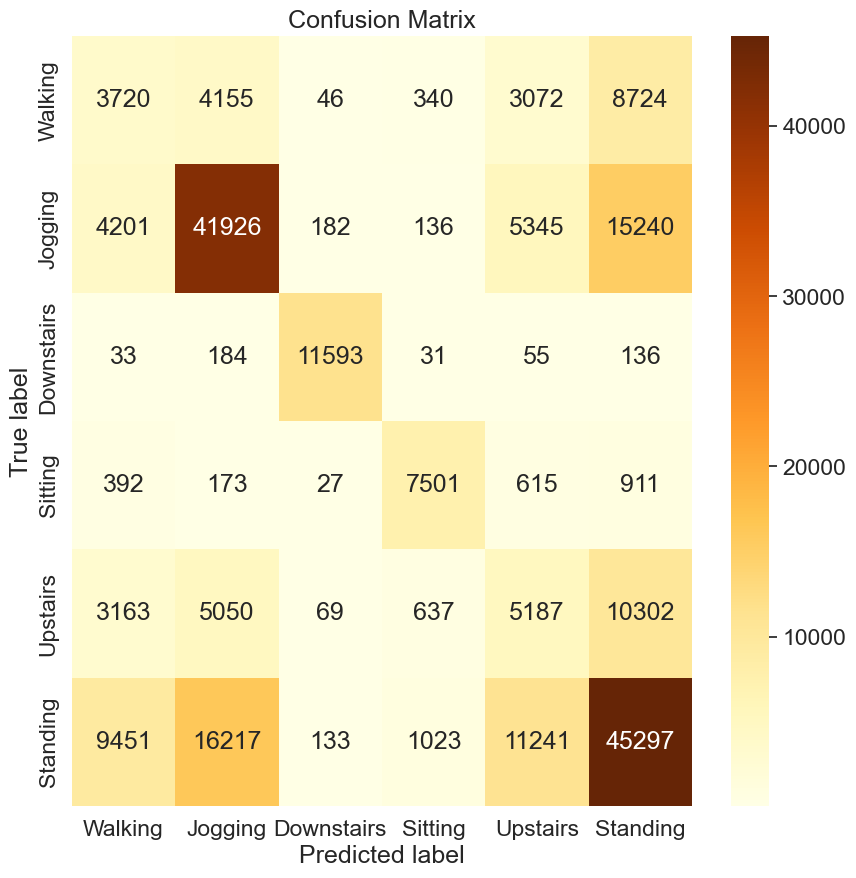

In [38]:
plot_confusion_matrix(y_test, y_pred)

Parameter Tunning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model = DecisionTreeClassifier()

Parameters setting

In [40]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10)}

Running the Grid Search on parameters and fit the trainning data

In [41]:
# 10-fold
#grs = GridSearchCV(model, param_grid=params, cv = 10)

# 5-fold default
grs = GridSearchCV(model, param_grid=params)

In [42]:
grs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

Output the optimal values

In [43]:
print("Best Hyper Parameters:",grs.best_params_)

Best Hyper Parameters: {'criterion': 'entropy', 'max_depth': 9}


Make a prediction and calculate metrics

In [44]:
model = grs.best_estimator_

In [45]:
y_pred=model.predict(X_test)

Evaluate the model

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.6112337650340866
Precision: 0.525719330394779
Recall: 0.6112337650340866
F1-score: 0.5429159540022503


In [47]:
CL_report = classification_report(y_test, y_pred, target_names = target_names)

In [48]:
print(CL_report)

              precision    recall  f1-score   support

     Walking       0.00      0.00      0.00     20057
     Jogging       0.69      0.67      0.68     67030
  Downstairs       0.86      0.96      0.91     12032
     Sitting       0.60      0.87      0.71      9619
    Upstairs       0.25      0.00      0.00     24408
    Standing       0.55      0.81      0.65     83362

    accuracy                           0.61    216508
   macro avg       0.49      0.55      0.49    216508
weighted avg       0.53      0.61      0.54    216508



In [49]:
classes = ['Walking', 'Jogging', 'Downstairs', 'Sitting', 'Upstairs', 'Standing']
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_mat, cmap=plt.cm.YlOrBr, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

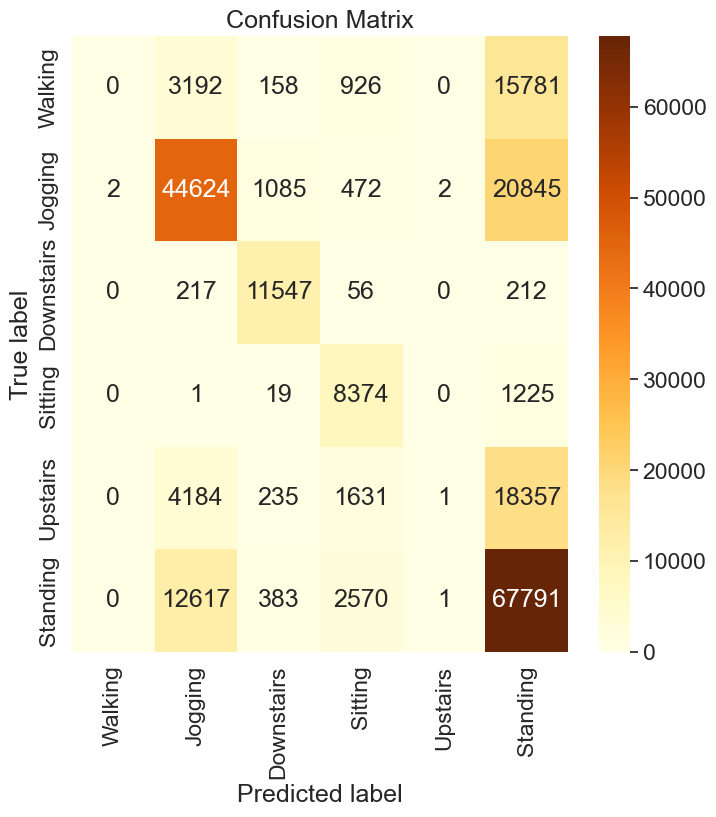

In [50]:
plot_confusion_matrix(y_test, y_pred)

Visualization the Tree

In [51]:
from matplotlib import pyplot as plt
from sklearn import tree

KeyError: 1

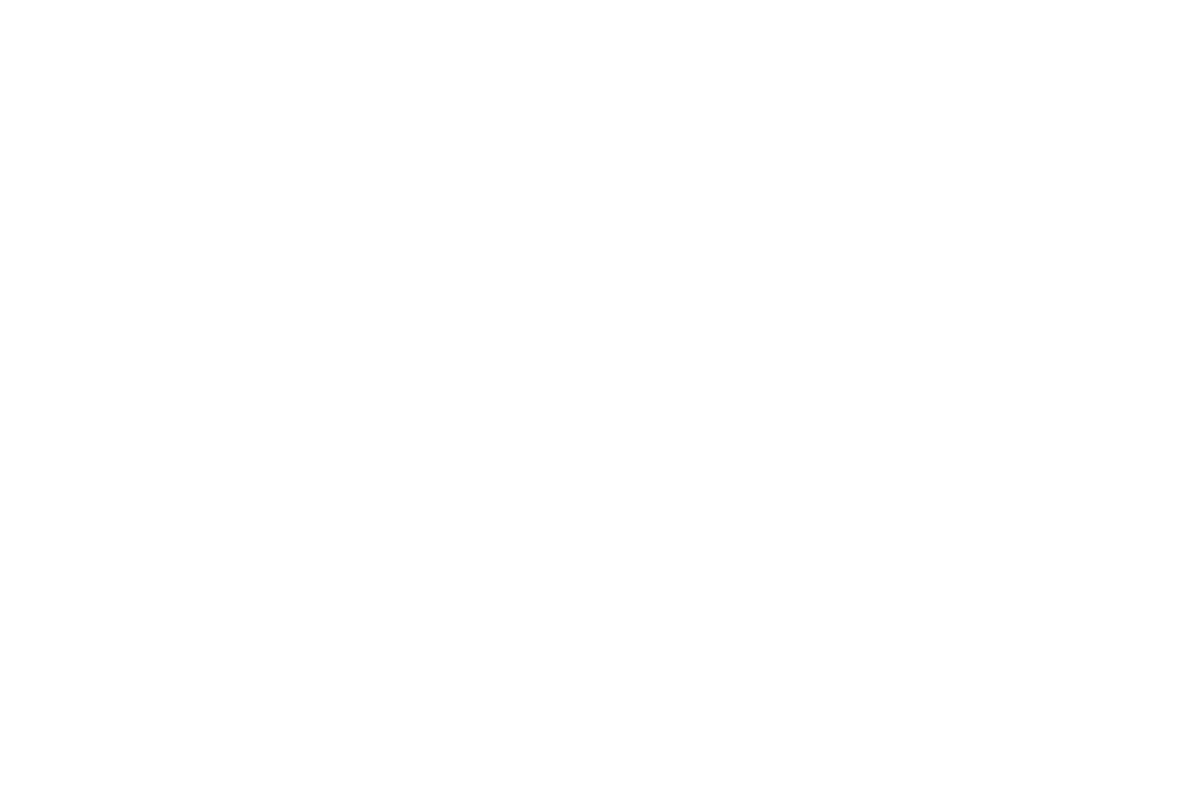

In [53]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   filled=True,
                   feature_names=X,  
                   class_names=y)